# Author : BADAR IFTIKHAR
### LETSGROWMORE  
### LGM VIP JANUARY-2022
### ADVANCED LEVEL TASK 3
### TASK 1 PROJECT :
### Develop A Neural Network That Can Read Handwriting

# Develop A Neural Network That Can Read Handwriting

### Import the packages

In [1]:
!pip install tensorflow

### Import the libraries

In [2]:
import tensorflow as tf
import numpy as np
from numpy import unique, argmax
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Reshapping the training & testing dataset

In [4]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

###  Normalize the value of pixels in images

In [5]:
# .as.type() has the capability to convert any suitable existing column to categorical type
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

### Training the images value

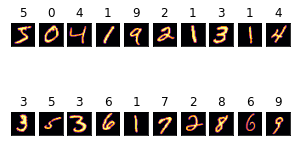

In [9]:
figure = plt.figure(figsize = (5,3))
for i in range(20):
  grid = figure.add_subplot(2, 10, i+1, xticks = [], yticks = [])
  grid.imshow(np.squeeze(X_train[i]), cmap = 'inferno')
  grid.set_title(y_train[i])

### Determine the shape of the input image

In [10]:
img_shape = X_train.shape[1:]
img_shape

(28, 28, 1)

### Defining the model

In [11]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),

                                    tf.keras.layers.Dense(128, activation = 'relu'), 

                                    tf.keras.layers.Dense(10)

                                  ])

### Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Plot Model

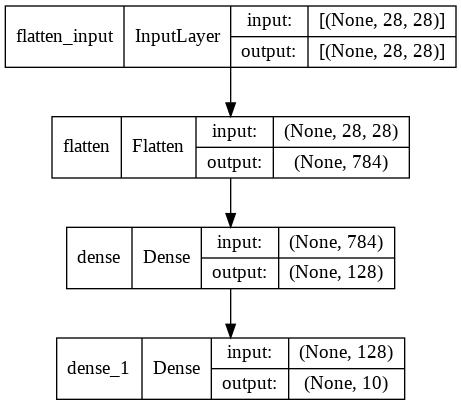

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

### Prediction from the model

In [14]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-0.08051167,  0.2283544 ,  0.08912641,  0.18001926, -0.49773502,
        -0.5434031 , -0.63550776, -0.27793157,  0.234461  ,  0.23831281]],
      dtype=float32)

In [15]:
tf.nn.softmax(predictions).numpy()

array([[0.09733912, 0.1325642 , 0.11533479, 0.12630908, 0.0641342 ,
        0.06127118, 0.05587991, 0.07990042, 0.1333762 , 0.13389093]],
      dtype=float32)

### Compiling the model

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer = 'adam', loss = loss_fn, metrics = ['accuracy'])

### Training the model

In [17]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2613 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9871


### Model Evaluation

In [18]:
model.evaluate(X_test, y_test, verbose = 5)

[0.06877431273460388, 0.9787999987602234]

### Probability of the model

In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.72569750e-09, 4.42657555e-09, 7.39644008e-07, 5.97759595e-07,
        2.41710818e-12, 1.14739134e-08, 2.12590010e-13, 9.99998093e-01,
        1.10867212e-07, 5.04826005e-07],
       [9.23449672e-09, 1.78874197e-05, 9.99958754e-01, 2.27226265e-05,
        4.74564668e-17, 4.78866582e-07, 3.50133291e-08, 5.88894775e-12,
        1.72920679e-07, 5.19934996e-15],
       [4.17794617e-08, 9.99594748e-01, 3.59470578e-05, 7.88305260e-06,
        7.35104768e-05, 2.16165554e-05, 1.96891074e-06, 8.57505511e-05,
        1.77783688e-04, 8.32923945e-07],
       [9.99984741e-01, 3.97902711e-10, 8.78404717e-06, 3.48013849e-08,
        1.35706113e-10, 1.44984540e-06, 2.22374206e-06, 2.34014055e-06,
        1.28938205e-09, 5.30491548e-07],
       [2.49993013e-06, 9.95995020e-09, 1.43307425e-05, 2.22082932e-07,
        9.88847733e-01, 6.43303849e-07, 9.67432152e-06, 7.56312584e-05,
        9.60379184e-05, 1.09531684e-02]], dtype=float32)>

### Testing the model

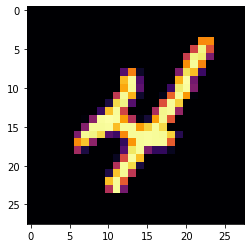

In [33]:
img = X_train[9]
plt.imshow(np.squeeze(img), cmap = 'inferno')
plt.show()

In [34]:
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
forecast = model.predict([img])
print("predicted: {}". format(argmax(forecast)))

predicted: 4
